<a href="https://colab.research.google.com/github/javierdesant/AI-assignments/blob/main/practica_neuronal_grupo_CITIM21_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Enunciado de la práctica

## 1. Objetivos de la práctica
El desarrollo de esta práctica pretende que el alumnado analice, diseñe e implemente soluciones a un problema usando las técnicas de computación evolutiva impartidas en la asignatura Inteligencia Artificial (IA). Para ello, el alumnado desarrollará de forma grupal (por cuartetos) un proyecto de programación en lenguaje Python mediante el uso del entorno de programación Google Colab y cuadernos de Python.

## 2. Caso de estudio
Se pretende resolver un problema de planificación de horarios para un grupo de los grados comunes de la E.T.S. de Ingeniería de Sistemas Informáticos. El problema de planificación de horarios consiste en distribuir $N$ asignaturas, cada una con un número $h_i$ de horas semanales, en un horario de $M$ días con $k$ horas por día, asegurando que se cumplan las siguientes restricciones:

* Cada hora de cada asignatura se debe impartir en un día y hora diferente, i.e. no puede haber solapamiento de horas.
* No se pueden impartir más de 2 horas de la misma asignatura el mismo día.

El objetivo es encontrar una planificación de horarios que tenga en cuenta las siguientes preferencias:

* Se desea que el horario sea lo más continuo posible, i.e. que no haya huecos vacíos al día entre asignatura y asignatura, o que este sea mínimo.
* Se desea que el horario sea lo más compacto posible, i.e. que se utilicen el menor número de días posibles.
* Se desea que si una asignatura imparte más de una hora al día, estas horas sean consecutivas.

Por ejemplo, si tenemos $N=3$ asignaturas (IA, ALG y BD) con las siguientes horas semanales: $h_1 = 1$, $h_2 = 2$ y $h_3 = 3$, y un horario de $M=3$ días con $k=3$ horas por día, una posible planificación sería:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  |  ALG   | BD     |       |
| Hora 2  |  ALG   | BD     |       |
| Hora 3  |  BD    | IA     |       |

Esta planificación cumple las restricciones, ya que no hay solapamiento de horas y no se imparten más de 2 horas de la misma asignatura el mismo día. Además, la solución es óptima ya que cumple todas las preferencias: no hay huecos entre asignaturas, el número de días es el menor posible y las horas de las asignaturas que se imparten más de una vez al día son consecutivas.

La siguiente solución sería válida, pero no óptima:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  |  IA    | BD     | ALG   |
| Hora 2  |        |        |       |
| Hora 3  |  BD    | BD     | ALG   |

Se puede apreciar que hay huecos entre asignaturas, que el número de días no es lo menor posible y que las horas de las asignaturas que se imparten más de una vez al día no son consecutivas.

Finalmente, se muestra un ejemplo de solución no válida:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  | IA/ALG | BD     |       |
| Hora 2  |  ALG   | BD     |       |
| Hora 3  |        | BD     |       |

Se puede apreciar que hay solapamiento de horas y que se imparten más de 2 horas de la misma asignatura el mismo día.

Para resolver este problema, se propone el uso de un algoritmo genético. El algoritmo genético deberá ser capaz de generar una población inicial de soluciones, evaluar la calidad de cada solución, seleccionar las mejores soluciones, cruzarlas y mutarlas para generar una nueva población de soluciones. El algoritmo deberá ser capaz de encontrar una solución óptima (o cercana al óptimo en los casos más complejos) en un tiempo razonable.

## 3. Desarrollo
El desarrollo de esta práctica supone completar este cuaderno de python para resolver el problema para varias configuraciones diferentes usando algoritmos genéticos. Además, usando este cuaderno de python, se quieren mostrar resultados de la ejecución de los algoritmos para extraer conclusiones sobre las configuraciones del problema. También se desea hacer una comparativa entre los algoritmos genéticos propuestos, las distintas representaciones propuestas, los distintos operadores y parámetros de configuración de los algoritmos genéticos, etc.

### 3.1 Primera aproximación

Como primera aproximación, se desarrollará un algoritmo genético para resolver el problema usando la siguiente representación y función de fitness:

* **Representación**: Cada solución será un array de tamaño $h_1 + h_2 + \ldots + h_N$ con alfabeto valores enteros en el rango $\Omega = [0, M \times k - 1]$. Cada valor del array representará la hora (con el correspondiente día) en la que se imparte cada hora de la asignatura $i$, i.e. si $sol_{i_0} = j$, la primera hora de la asignatura $i$ se imparte en el día $j // k$ y en la hora $j \% k$. E.g. en el ejemplo 1 del enunciado, la solución sería $sol = [5, 0, 1, 2, 3, 4]$.
* **Función de fitness**: La función de fitness se define mediante la siguiente fórmula:

$$ fitness(sol) = \left\{ \begin{array}{ll} 0 & \text{si } C_1 > 0 \; || \; C_2 > 0 \\ \\ \frac{1}{1+ P_1 + P_2 + P_3} & \text{en otro caso} \end{array} \right. $$

  donde:

* $C_1 =$ Número de solapamientos entre asignaturas. E.g. en el ejemplo 3 del enunciado, $C_1 = 1$. Si hubiera tres asignaturas a la vez en una misma hora, se consideraría un solapamiento de 2; si hubiera cuatro asignaturas a la vez en una misma hora, se consideraría un solapamiento de 3, etc.
* $C_2 =$ Número de horas por encima de 2 de una misma asignatura impartidas el mismo día. E.g. en el ejemplo 3 del enunciado, $C_2 = 1$.
* $P_1 =$ Número de huecos vacíos entre asignaturas. E.g. en el ejemplo 2 del enunciado, $P_1 = 3$. Si hubiera dos huecos entre asignaturas, se consideraría un hueco de 2; si hubiera tres huecos entre asignaturas, se consideraría un hueco de 3, etc.
* $P_2 =$ Número de días utilizados en los horarios. E.g. en el ejemplo 1 del enunciado, $P_2 = 2$.
* $P_3 =$ Número de asignaturas con horas NO consecutivas en un mismo día. E.g. en el ejemplo 2 del enunciado, $P_3 = 2$.

Utilizando la representación y función de fitness propuestas, se aplicará el algoritmo genético utilizando las siguiente configuración:
* **Población inicial**: $pop_{size}=50$ soluciones aleatorias.
* **Selección**: Selección por torneo con $T=2$.
* **Cruce**: Cruce de un punto con probabilidad $P_{cruce}=0.8$.
* **Mutación**: Mutación uniforme con probabilidad $P_{mut}=0.1$.
* **Selección ambiental (nueva población)**: Reemplazo generacional sin elitismo.
* **Criterio de parada**: Número de generaciones $n_{gens}=50$.

### 3.2 Aproximación final propuesta

Se deberá proponer una o varias aproximaciones finales para resolver el problema de planificación de horarios. Estas aproximaciones deberán ser diferentes a la propuesta en la primera aproximación y deberán justificarse adecuadamente. Para cada aproximación se deberá proponer e implementar:
* **Representación**: Se puede proponer una representación diferente a la propuesta en la primera aproximación. Se deberá justificar adecuadamente la elección de la representación.
* **Función de fitness**: Se puede proponer una función de fitness diferente a la propuesta en la primera aproximación. Se deberá justificar adecuadamente la elección de la función de fitness.
* **Operadores genéticos**: Se pueden proponer operadores genéticos (selección, cruce y mutación) diferentes a los propuestos en la primera aproximación. Se deberá justificar adecuadamente la elección de los operadores genéticos. También se puede proponer una selección ambiental diferente que mejore la convergencia del algoritmo (e.g. usar elitismo).
* **Configuración del algoritmo genético**: Se pueden proponer parámetros de configuración diferentes a los propuestos en la primera aproximación (probabilidades, $pop_{size}$, etc), así como proponer un criterio de parada diferente que mejore la convergencia del algoritmo (e.g. parar cuando la fitness se estanque). En ningún caso, $pop_{size}$ ni $n_{gens}$ podrán ser superiores a 100. Se deberá justificar adecuadamente la elección de los parámetros de configuración.

### Experimentación

Dada la naturaleza estocástica de los algoritmos genéticos, cada aproximación (con cada configuración que se pruebe) deberá ser evaluada al menos 31 veces con distintos números aleatorios (semillas). Para cada aproximación, se deberá proporcionar una tabla comparativa entre la primera aproximación y las aproximaciones finales propuestas. Se deberá hacer un análisis estadístico de los resultados obtenidos obteniendo la media y desviación estándar de las 31 ejecuciones tanto para los distintos indicadores de calidad (C1, C2, P1, P2, P3) de la mejor solución encontrada en cada ejecución, como para los tiempos de ejecución y el número de generación en el cual ha parado la ejecución.

En cada aproximación, se deberá mostrar gráficamente la evolución de la fitness de la mejor solución y de la media de la población en cada generación para la peor ejecución, la mejor ejecución y la ejecución media. Además, se deberá mostrar la mejor solución encontrada en cada una de estas tres ejecuciones.

Para cada aproximación propuesta se debe proporcionar una tabla de estas características (Puede usarse un generador de tablas https://www.tablesgenerator.com/markdown_tables o pandas https://pandas.pydata.org/docs/user_guide/index.html):

| Dataset | Algoritmo | Tiempo(s)   | Generaciones | C1        | C2        | P1        | P2        | P3        |
|---------|-----------|-------------|--------------|-----------|-----------|-----------|-----------|-----------|
|   1     |  Primero  | $10\pm 3.5$ | $50\pm 0$    | $1\pm 1$  | $2\pm 1$  | $1\pm 2$  | $3\pm 1$  | $2\pm 1$  |
|   1     |  Final 1  | $5 \pm 1.2$ | $38\pm 12$   | $0\pm 0$  | $0\pm 0$  | $0\pm 1$  | $2\pm 1$  | $0\pm 1$  |
|   2     |  Final 1  | $25\pm 2.3$ | $73\pm 22$   | $0\pm 0$  | $0\pm 1$  | $1\pm 1$  | $3\pm 0$  | $1\pm 1$  |

## 4. Normativa de la práctica
Para el desarrollo del proyecto de programación se proporciona este cuaderno que sirve a modo de proyecto de programación. Se han propuesto varias configuraciones de horarios para utilizar en las distintas pruebas. Se permiten crear todas las funciones adicionales que sea necesario siempre y cuando se respete la estructura general de este cuaderno. Este cuaderno es el único entregable, por tanto desarrollar código fuera de él no es recomendable.

Además de explicar las decisiones tomadas, será necesario realizar una comparativa de resultados en una o varias tablas, así como incluir una comparativa final.

La práctica debe realizarse teniendo en cuenta la siguiente normativa:
* NO está permitido alterar los nombres, parámetros ni tipo de retorno de ninguno de los métodos proporcionados. El método modificado se evaluará como 0 así como todos los métodos que dependan de él.
* No está permitido el uso de librerías externas excepto numpy y pandas. El uso de librerías externas hará que se evalúe la práctica como 0.
* La práctica se realizará de forma grupal (grupos de 4 alumnos). Cada grupo deberá desarrollar de manera independiente su propia práctica y realizar su propia entrega.
* El plagio de la práctica queda estrictamente prohibido. La detección de plagio supondrá una calificación de 0 en la convocatoria de la asignatura para todos los alumnos implicados, así como la posibilidad de apertura de expediente académico disciplinar.
* Para ser evaluado de la práctica es obligatorio entregarla en plazo, habiendo realizado correctamente al menos una funcionalidad de las pedidas. Una entrega fuera de plazo será evaluada como 0.
* Usa este cuaderno a modo de memoria, justificando las decisiones que tomes a lo largo del proceso de desarrollo. El desarrollo en texto puntúa de cara a la nota de la práctica.
* De cara a la entrega es estrictamente necesario entregar el cuaderno ejecutado al completo. Una entrega que no haya sido ejecutada con éxito hasta la última celda será evaluada como 0. (Entregad el archivo .ipynb)
* Se debe comentar el código adecuadamente. Este apartado es puntuable.

# Cuerpo de la práctica
Usa las siguientes celdas para desarrollar todo el código pedido. Recuerda respetar esta estructura general y añadir celdas siempre dentro de cada apartado.

# Primera Aproximación

## Representación y función de fitness

### Representación

In [1741]:
# Ejemplo de dataset de entrada para el problema de asignación de horarios
dataset = {"n_courses" : 3,
           "n_days" : 3,
           "n_hours_day" : 3,
           "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

In [1742]:
import numpy as np

def generate_random_array_int(alphabet, length):
    # Genera un array de enteros aleatorios de tamaño length
    # usando el alfabeto dado
    return np.random.choice(alphabet, length)

def generate_initial_population_timetabling(pop_size, *args, **kwargs):
    dataset = kwargs['dataset'] # Dataset con la misma estructura que el ejemplo
    # Obtener el alfabeto y la longitud a partir del dataset
    m = dataset['n_days']
    k = dataset['n_hours_day']
    length = 0
    for i in dataset['courses']:
      length += i[1]
    # Genera una población inicial de tamaño pop_size
    return [generate_random_array_int(list(range(0, m * (k - 1))), length) for i in range(pop_size)]

In [1743]:
################################# NO TOCAR #################################
#                                                                          #
def print_timetabling_solution(solution, dataset):
    # Imprime una solución de timetabling
    n_days = dataset['n_days']
    n_hours_day = dataset['n_hours_day']
    courses = dataset['courses']

    # Crea una matriz de n_days x n_hours_day
    timetable = [[[] for _ in range(n_hours_day)] for _ in range(n_days)]

    # Llena la matriz con las asignaturas
    i = 0
    max_len = 6 # Longitud del título Día XX
    for course in courses:
        for _ in range(course[1]):
            day = solution[i] // n_hours_day
            hour = solution[i] % n_hours_day
            timetable[day][hour].append(course[0])
            i += 1
            # Calcula la longitud máxima del nombre de las asignaturas
            # en una misma franja horaria
            max_len = max(max_len, len('/'.join(timetable[day][hour])))

    # Imprime la matriz con formato de tabla markdown
    print('|         |', end='')
    for i in range(n_days):
        print(f' Día {i+1:<2}{" "*(max_len-6)} |', end='')
    print()
    print('|---------|', end='')
    for i in range(n_days):
        print(f'-{"-"*max_len}-|', end='')
    print()
    for j in range(n_hours_day):
        print(f'| Hora {j+1:<2} |', end='')
        for i in range(n_days):
            s = '/'.join(timetable[i][j])
            print(f' {s}{" "*(max_len-len(s))}', end=' |')
        print()
#                                                                          #
################################# NO TOCAR #################################

In [1744]:
# Ejemplo de uso de la función generar individuo con el dataset de ejemplo
candidate = generate_random_array_int(list(range(9)), 6)
print_timetabling_solution(candidate, dataset=dataset)

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | BD     |        |
| Hora 2  |        | IA     | ALG    |
| Hora 3  |        | ALG/BD |        |


### Función de fitness

In [1745]:
def calculate_c1(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula la cantidad de asignaturas que se imparten en mismas franjas horarias
    unique_values, counts = np.unique(solution, return_counts=True)
    return int(np.sum(counts > 1))

def calculate_c2(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula la cantidad de horas por encima de 2 que se imparten
    # de una misma asignatura en un mismo día
    sol = 0
    hours = howManyHours(solution, dataset)
    for i in range(0, len(hours)):
        for j in range(0, len(hours[0])):
            if(hours[i][j] > 2):
                sol += 1
    return sol


def calculate_p1(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el número de huecos vacíos entre asignaturas
    auxRange = dataset['n_hours_day']
    sol = 0
    for i in range(0, dataset['n_days']):
        Max = (auxRange * (i+1))-1
        Min = auxRange * i
        candidato = solution[(solution >= Min) & (solution <= Max)]
        candidato.sort()
        if (candidato.size > 0): primero = candidato[0]
        if (not (len(candidato) <= 1)):
            for j in range(0, len(candidato)):
                if(not (j == len(candidato)-1)):
                    if(not(candidato[j+1] == candidato[j])):
                        sol += ((candidato[j+1] - candidato[j])-1)
    return int(sol)


def calculate_p2(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el número de días utilizados en los horarios
    auxRange = dataset['n_hours_day']
    
    sol = 0
    for i in range(0, dataset['n_days']):
        Max = (auxRange * (i+1))-1
        Min = auxRange * i
        if(len([n for n in solution if Min <= n <= Max]) == 0):
            sol += 1
    sol = dataset['n_days'] - sol
    return sol

def calculate_p3(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el número de asignaturas con horas NO consecutivas en un mismo día
    sol = 0
    solCopy = solution.copy()
    for i in range(0,dataset['n_courses']):
        numCasillas = dataset['courses'][i][1]
        candidato = []
        for j in range(0, numCasillas):
            candidato.append(solCopy[0])
            solCopy = np.delete(solCopy, 0)
        #ahora ya tenemos los arrays de cada asignatura y hay que procesarlo
        candidato.sort()
        for k in range(0, len(candidato)):
            if(not k+1 == len(candidato)):
                if(not(candidato[k] == (candidato[k+1]+1) or candidato[k] == (candidato[k+1]-1))):
                    if(candidato[k]//dataset['n_hours_day'] == candidato[k+1]//dataset['n_hours_day']):
                        sol += 1
   
    return sol




def fitness_timetabling(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el fitness de una solución de timetabling siguiendo la fórmula del enunciado
    c1 = calculate_c1(solution, *args, **kwargs)
    c2 = calculate_c2(solution, *args, **kwargs)
    p1 = calculate_p1(solution, *args, **kwargs)
    p2 = calculate_p2(solution, *args, **kwargs)
    p3 = calculate_p3(solution, *args, **kwargs)
    if (c1 > 0 or c2 > 0):
        return 0
    else: return 1/(1+p1+p2+p3)

#FUNCIONES AUXILIARES 

def howManyHours(solution, data):
    
    k = data['n_hours_day']
    hoursPerSubjectAux = hoursPerSubject(data)
    sol = []
    auxHour = 0
    for r in range(0,len(hoursPerSubjectAux)):
        sol.append([])
        for y in range(0,data['n_days']):
            sol[r].append(0)
    
    for i in  range(0,len(hoursPerSubjectAux)):
        for j in range(0, hoursPerSubjectAux[i]):
            sol[i][solution[auxHour] // k] += 1
            auxHour += 1
    return sol
    

def hoursPerSubject(data):
    hours =[]
    courses = data['courses']
    for i in range(0,len(courses)):
        candidate = courses[i]
        hours.append(candidate[1])
    return hours

# Pistas:
# - Una función que devuelva la tabla de horarios de una solución
# - Una función que devuelva la cantidad de horas por día de cada asignatura
# - A través de args y kwargs se pueden pasar argumentos adicionales que vayamos a necesitar

In [1746]:

fitness_timetabling(candidate, dataset=dataset) # Devuelve la fitness del candidato de ejemplo

0

## Operadores genéticos

### Selección por torneo

In [1747]:
def tournament_selection(population, fitness, number_parents, *args, **kwargs):
    t = kwargs['tournament_size'] # Tamaño del torneo
    newPopulation = []
    for i in range(0,number_parents):
        torneo = []
        aux = []
        torneo_fitness = []
        for j in range(0,t):
            aux.append(np.random.randint(0,len(population)))
            torneo.append(population[aux[j]])
            torneo_fitness.append(fitness[aux[j]])
        newPopulation.append(torneo[torneo_fitness.index(max(torneo_fitness))])
    # Selecciona number_parents individuos de la población mediante selección por torneo
    return newPopulation
# Pista:
# - Crear una función auxiliar que genere un padre a partir de una selección por torneo
# - Recuerda usar la misma librería de números aleatorios que en el resto del código

### Cruce de un punto

In [1748]:

def one_point_crossover(parent1, parent2, p_cross, *args, **kwargs):
    # Realiza el cruce de dos padres con una probabilidad p_cross
    
    p1 = parent1.copy()
    p2 = parent2.copy()
    sol1 = np.empty(0, dtype=int)
    sol2 = np.empty(0, dtype=int)
    if(np.random.random() < p_cross):
        puntoDeCorte = np.random.randint(1,len(parent1))
        for i in range(0,puntoDeCorte):
            sol1 = np.append(sol1, p2[0])
            p2 = np.delete(p2, 0)
            sol2 = np.append(sol2, p1[0])
            p1 = np.delete(p1, 0)
        sol1 = np.concatenate((sol1, p1))
        sol2 = np.concatenate((sol2, p2))
        return sol1, sol2 
    else:  
        
        return parent1, parent2      


### Mutación uniforme

In [1749]:
def uniform_mutation(chromosome, p_mut, *args, **kwargs):
    dataset = kwargs['dataset'] # Dataset con la misma estructura que el ejemplo
    # Realiza la mutación gen a gen con una probabilidad p_mut
    # Obtener el alfabeto del dataset para aplicar la mutación
    sol = chromosome.copy()
    m = dataset['n_days']
    k = dataset['n_hours_day']
    for i in range(0,len(sol)):
        if(np.random.random() < p_mut):
            sol[i] = np.random.randint(0,m*k)
    return sol

### Selección ambiental (reemplazo generacional)

In [1750]:
def generational_replacement(population, fitness, offspring, fitness_offspring, *args, **kwargs):
    # Realiza la sustitución generacional de la población
    # Debe devolver tanto la nueva población como el fitness de la misma
    p = population.copy()
    fit = fitness.copy()
    offP = offspring.copy()
    offFit = fitness_offspring.copy()
    for i in range(0,len(offspring)):
        p.pop(0)
        p.append(offP.pop(0))
        fit.pop(0)
        fit.append(offFit.pop(0))
    
    return p, fit

## Algoritmo genético

### Condición de parada (número de generaciones)

In [1751]:
def generation_stop(generation, fitness, *args, **kwargs):
    max_gen=kwargs['max_gen']
    # Comprueba si se cumple el criterio de parada (máximo número de generaciones)
    if(generation == max_gen):
        return False
    else: return True

### Algoritmo genético

In [1752]:
def genetic_algorithm(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                      selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    # Aplica un algoritmo genético a un problema de maximización
    population = None # Crea la población de individuos de tamaño pop_size
    fitness = [] # Contiene la evaluación de la población
    best_fitness = [] # Guarda el mejor fitness de cada generación
    mean_fitness = [] # Guarda el fitness medio de cada generación
    generation = 0 # Contador de generaciones

    # 1 - Inicializa la población con la función generate_population
    population = generate_population(pop_size,*args ,**kwargs)
    generation += 1
    fitness = [0.] * len(population) 
    
    # 2 - Evalúa la población con la función fitness_function
    for i in range(0,len(population)):
        fitness[i] = fitness_function(population[i],*args, **kwargs)
    best_fitness.append(max(fitness))
    mean_fitness.append(sum(fitness) / len(fitness))
    
    # 3 - Mientras no se cumpla el criterio de parada stopping_criteria
    while(stopping_criteria(generation,fitness,*args, **kwargs)):
        
        # 4 - Selección de padres con la función selection
        # 5 - Cruce de padres mediante la función crossover con probabilidad p_cross
        auxP = population.copy()
        auxF = fitness.copy()
        offspring_fitness = []
        offspring = selection(population, fitness, offspring_size,*args, **kwargs)
        for i in range(0,len(offspring)//2):
            offspring[i],offspring[i+1] = crossover(offspring[i],offspring[i+1],p_cross,*args,**kwargs)
            # 6 - Mutación de los descendientes con la función mutation con probabilidad p_mut
            offspring[i] = mutation(offspring[i],p_mut,*args,**kwargs)
            offspring[i+1] = mutation(offspring[i+1],p_mut,*args,**kwargs)
            # 7 - Evaluación de los descendientes    
            offspring_fitness.append(fitness_function(offspring[i], *args, **kwargs))
            offspring_fitness.append(fitness_function(offspring[i+1], *args, **kwargs))

        # 8 - Generación de la nueva población con la función environmental_selection
        
        auxP, auxF = environmental_selection(population,fitness,offspring,offspring_fitness,offspring_size,*args,**kwargs)
        population = auxP.copy()
        fitness = auxF.copy()
        best_fitness.append(max(fitness))
        mean_fitness.append(sum(fitness) / len(fitness))
        generation += 1
        
    return population, fitness, generation, best_fitness, mean_fitness

# Aproximación final propuesta
Usa las siguientes celdas para desarrollar la aproximación final propuesta. Elimina aquellas que no apliquen en tu caso.

## Representación y función de fitness propuestas

### Representación(es) propuesta(s)

In [1753]:
# Ejemplo de dataset de entrada para el problema de asignación de horarios
dataset = {"n_courses" : 3,
           "n_days" : 3,
           "n_hours_day" : 3,
           "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

In [ ]:
### Coloca aquí tus funciones propuestas para la generación de población inicial ###
import numpy as np

def generate_initial_population_final(pop_size, *args, **kwargs):
    dataset = kwargs['dataset'] # Dataset con la misma estructura que el ejemplo
    # Obtener el alfabeto y la longitud a partir del dataset
    # Genera una población inicial de tamaño pop_size
    m = dataset['n_days']
    k = dataset['n_hours_day']
    return [array_generator_final(np.empty(shape=(k,m), dtype=object), dataset=dataset) for i in range(pop_size)] 

def array_generator_final(array, *args, **kwargs):
    dataset = kwargs['dataset']
    aux = array.copy()
    m = dataset['n_days']
    k = dataset['n_hours_day']
    c = dataset['courses']
    for i in range(0,len(c)):
        for j in range(0,c[i][1]):
            aux_m = np.random.randint(0,m)
            aux_k = np.random.randint(0,k)
            if(aux[aux_k,aux_m] == None):
                aux[aux_k,aux_m] = str(i) 
            else:aux[aux_k,aux_m] = aux[aux_k,aux_m] + str(i)
    for i in range(0,k):
        for j in range(0,m):
            if(aux[i,j] == None):
               aux[i,j] = '' 
    return aux



Se ha pensado en esta representacion para ser visualmente mas clara y mas facil de operar y analizar.

Desde el punto de vista informatico hemos pensado en utilizar strings en cada franja horaria lo que nos permite trabajar con ellos mas facilmente a la hora de contar longitudes, acceder a elementos del string, contar apariciones de un elemento, etc.

Para que no diese problemas numpy al trabajar con str de longitud variable simplemente seteamos el dtype = object.

Las filas son los tramos horarios, las columnas son los dias y los numeros en cada franja horaria las asignaturas('12' = IA y ALG, IA = 1 y ALG = 2)

### Función(es) de fitness propuesta(s)

Hemos decidido que la parte en la que nuestra formula decide si es valida o no una solución va a ser igual a la del enunciado,
ya que se tiene que poner una penalización si dos asignaturas estan en una misma franja horaria y tambien si se dan mas de dos horas en un mismo dia. Solamente cambiaremos un poco la forma en la que actuan en la fitness para mejorarla un poco.
c1, c2 identicas a primera aproximación
Solo nos queda analizar como medimos la calidad del la solucion a partir de p2, p3 y p1 que va ser igual que p3 de la primera paroximacion pero maximizando.

FITNESS:

((1+p3)/((1 + p1 + p2 + c1)**(c1 + c2)))

p1 = dias utilizados y validos
p2 = numero de asignaturas aisladas (no tienen ninguna asignatura inmediatamente antes o despues)
p3 = dias vacios


In [ ]:
### Coloca aquí tus funciones de fitness propuestas ###
def calculate_c1_final(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula la cantidad de asignaturas que se imparten en mismas franjas horarias
    m = dataset['n_days']
    k = dataset['n_hours_day']
    sol = 0
    for i in range(0,m):
        for j in range(0,k):
            if(not(len(solution[j,i]) < 2)):
                sol += len(solution[j,i])-1
    return sol

def calculate_c2_final(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    m = dataset['n_days']
    sol = 0
    for i in range(0, m):
        actualAux = solution[: ,i]
        allSubjects = ','.join(actualAux)
        for j in range(0,dataset['n_courses']):
            if( not allSubjects.count(str(j)) < 3):
                sol += 1
    return sol

def calculate_p1_final(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    m = dataset['n_days']
    sol = 0
    for i in range(0, m):
        actualAux = solution[: ,i]
        if(np.all(actualAux == '')):
            sol += 1
    return sol
def calculate_p2_final(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    m = dataset['n_days']
    k = dataset['n_hours_day']
    sol = 0
    for i in range(0, m):
        actualAux = solution[: ,i]
        for j in range(0,k):
            if((not j==0 )and (not j==k-1)):
                if((not actualAux[j] == '') and (actualAux[j-1] == '') and (actualAux[j+1] == '')):
                    sol += 1
            elif(j==0):
                if((not actualAux[j] == '') and (actualAux[j+1] == '')):
                    sol += 1
            elif(j== k-1):
                if((not actualAux[j] == '') and (actualAux[j-1] == '')):
                    sol += 1
    return sol

def calculate_p3_final(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    m = dataset['n_days']
    k = dataset['n_hours_day']
    sol = 0
    for i in range(0, m):
        actualAux = solution[: ,i]
        if(not np.any(actualAux == '')):
            sol += 1
    return sol

def calculate_fitness_final(solution, *args, **kwargs):
    c1 = calculate_c1_final(solution, *args, **kwargs)
    c2 = calculate_c2_final(solution, *args, **kwargs)
    p1 = calculate_p1_final(solution, *args, **kwargs)
    p2 = calculate_p2_final(solution, *args, **kwargs)
    p3 = calculate_p3_final(solution, *args, **kwargs)
    
    return ((1+p3+p1)/((1 + p2 + c1)**(c1 + c2)))


## Operadores genéticos

### Selección

In [1756]:
### Coloca aquí tus funciones de selección propuestas ###
def tournament_selection_final(population, fitness, number_parents, *args, **kwargs):
    t = kwargs['tournament_size'] # Tamaño del torneo
    auxp = population.copy()
    auxF = fitness.copy()
    newPopulation = []
    for i in range(0,number_parents):
        torneo = []
        aux = []
        torneo_fitness = []
        for j in range(0,t):
            aux.append(np.random.randint(0,len(population)))
            torneo.append(auxp[aux[j]])
            torneo_fitness.append(auxF[aux[j]])
        newPopulation.append(torneo.pop(torneo_fitness.index(max(torneo_fitness))))
    return newPopulation

creemos que la mejor selección para resultados optimos es seleccion por torneo con un N un poco superior al de la primera aproximacion dejando asi menos posibilidades a los menos aptos. Luego veremos que lo hemos realizado con N=4 y N=8, que aumentan considerablemente el rendimiento del algoritmo

### Cruce

In [1757]:
### Coloca aquí tus funciones de cruce propuestas ###
def one_subject_crossover(parent1, parent2, p_cross, *args, **kwargs):
    dataset = kwargs['dataset']
    p1 = parent1.copy()
    p2 = parent2.copy()
    m = dataset['n_days']
    k = dataset['n_hours_day']
    if(np.random.random() < p_cross):
        asignatura = np.random.randint(0,dataset['n_courses'])
        for i in range(0,m):
            for j in range(0,k):
                if(not(p1[j,i].count(str(asignatura)) == p2[j,i].count(str(asignatura)))):
                    num1 = p1[j,i].count(str(asignatura))
                    num2 = p2[j,i].count(str(asignatura))
                    p1[j,i] = p1[j,i].replace(str(asignatura), '')
                    p2[j,i] = p2[j,i].replace(str(asignatura), '')
                    for e in range(0,num1):
                            p2[j,i] = p2[j,i] + str(asignatura)
                    for e in range(0,num2):
                            p1[j,i] = p1[j,i] + str(asignatura)
        
        return p1.copy(), p2.copy()
    else:  
        
        return parent1.copy(), parent2.copy()

Para hacer el cruce se nos presenta un problema, no podemos alterar la solucion de forma que haya mas horas de las estipuladas en el dataset. Habra que apañarse con esto en mente. Lo que vamos a hacer va a ser intercambiar todas las posiciones de una asignatura aleatoria entre las soluciones

### Mutación

In [ ]:
### Coloca aquí tus funciones de mutación propuestas ###
def change_every_mutation(solution, p_mut, *args, **kwargs):
    dataset = kwargs['dataset']
    sol = solution.copy()
    m = dataset['n_days']
    k = dataset['n_hours_day']
    randX = np.random.randint(0,k)
    randY = np.random.randint(0,m)
    for i in range(0, m):
        for j in range(0,k): 
            if(np.random.random() < p_mut and not sol[j,i] == ''):
                while(randX == j and randY == i):
                    randX = np.random.randint(0,k)
                    randY = np.random.randint(0,m)
                obj1 = sol[j,i][np.random.randint(0,len(sol[j,i]))]
                if(not sol[randX,randY] == ''):
                    obj2 = sol[randX,randY][np.random.randint(0,len(sol[randX,randY]))]
                    sol[randX,randY] = sol[randX,randY].replace(obj2, '', 1)
                else:
                    obj2 = ''
    
                sol[j,i] = sol[j,i].replace(obj1, '', 1) + obj2
                sol[randX,randY] = sol[randX,randY] + obj1
    return sol.copy()



En esta mutacion hacemos que cada franja horaria con asignatura se mueva a otra aleatoria con la que se intercambia.

### Selección ambiental

In [1759]:
### Coloca aquí tus funciones de reemplazo propuestas ###
def elite_selection(population, fitness, offspring, fitness_offspring, eliteN, *args, **kwargs):
    p = population.copy()
    fit = fitness.copy()
    offP = offspring.copy()
    offFit = fitness_offspring.copy()
    for i in range(0,eliteN):
        offP.append(p[fit.index(max(fit))])
        offFit.append(fit[fit.index(max(fit))])
        p.pop(fit.index(max(fit))) 
        fit.pop(fit.index(max(fit))) 
    for j in range(0,eliteN):
        offP.pop(offFit.index(min(offFit))) 
        offFit.pop(offFit.index(min(offFit))) 
    p = p + offP
    fit = fit + offFit 
    return p, fit


Optamos por el relevo generacional con elitismo pero un poco modificado.Añadiremos los eliteN mejores individuos de la poblacion a los sucesores y luego eliminamos los eliteN peores individuos de los sucesores dejando asi solo a los mejores.

### Criterio de parada

In [1760]:
### Coloca aquí tus funciones de parada propuestas ###
def generation_stop_final(generation, fitness, *args, **kwargs):
    max_gen=kwargs['max_gen']
    # Comprueba si se cumple el criterio de parada (máximo número de generaciones)
    if(generation == max_gen):
        return False
    else: return True


# Experimentos
Usa la función `run_ga` para extraer resultados.

## Utilidades
Usa estas funciones pre-programadas para ejecutar los experimentos y resumir el código.

### Temporizador

In [1761]:
################################# NO TOCAR #################################
#                                                                          #
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        res = func(*args, **kwargs)
        end = time.time()
        return *res, end - start
    return wrapper
#                                                                          #
################################# NO TOCAR #################################

# Este codigo temporiza la ejecución de una función cualquiera

### Envoltorios

In [1762]:
################################# NO TOCAR #################################
#                                                                          #
@timer
def run_ga(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
           selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    # Además del retorno de la función, se devuelve el tiempo de ejecución en segundos
    return genetic_algorithm(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                             selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs)
#                                                                          #
################################# NO TOCAR #################################


### Datasets
Configuraciones de horarios para utilizar en las pruebas.

In [1763]:
# Se deben probar los 6 datasets
dataset1 = {"n_courses" : 3,
            "n_days" : 3,
            "n_hours_day" : 3,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

dataset2 = {"n_courses" : 4,
            "n_days" : 3,
            "n_hours_day" : 4,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3), ("POO", 2)]}

dataset3 = {"n_courses" : 4,
            "n_days" : 4,
            "n_hours_day" : 4,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4)]}

dataset4 = {"n_courses" : 5,
            "n_days" : 4,
            "n_hours_day" : 6,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4)]}

dataset5 = {"n_courses" : 7,
            "n_days" : 4,
            "n_hours_day" : 8,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2)]}

dataset6 = {"n_courses" : 11,
            "n_days" : 5,
            "n_hours_day" : 12,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2), ("FC", 4), ("TSO", 2), ("AM", 4), ("LMD", 4)]}

### Generación de números aleatorios

In [1764]:
import numpy as np
import random

def set_seed(seed):
    # Se debe fijar la semilla usada para generar números aleatorios
    # Con la librería random
    random.seed(seed)
    # Con la librería numpy
    np.random.seed(seed)

### Métricas
Métricas a estudiar en los experimentos.

In [1765]:
################################# NO TOCAR #################################
#                                                                          #
def best_solution(population, fitness):
    # Devuelve la mejor solución de la población
    return population[fitness.index(max(fitness))]


import matplotlib.pyplot as plt
def plot_fitness_evolution(best_fitness, mean_fitness):
    plt.plot(best_fitness, label='Best fitness')
    plt.plot(mean_fitness, label='Mean fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()
#                                                                          #
################################# NO TOCAR #################################

### Lanzador de experimentos

In [1766]:
from statistics import mean, median, stdev

def launch_experiment(seeds, dataset, generate_population, pop_size, fitness_function, c1, c2, p1, p2, p3, stopping_criteria,
                      offspring_size, selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    best_individuals = []
    best_inds_c1 = []
    best_inds_c2 = []
    best_inds_p1 = []
    best_inds_p2 = []
    best_inds_p3 = []
    best_inds_fitness = []
    best_fitnesses = []
    mean_fitnesses = []
    last_generations = []
    execution_times = []
    # Ejecutamos el algoritmo con cada semilla
    for seed in seeds:
        print(f"Running Genetic Algorithm with seed {seed}")
        set_seed(seed)
        population, fitness, generation, best_fitness, mean_fitness, execution_time = run_ga(generate_population, pop_size, fitness_function,stopping_criteria,
                                                                                             offspring_size, selection, crossover, p_cross, mutation, p_mut,
                                                                                             environmental_selection, dataset=dataset, *args, **kwargs)
        best_individual = best_solution(population, fitness)
        best_ind_c1 = c1(best_individual, dataset=dataset)
        best_ind_c2 = c2(best_individual, dataset=dataset)
        best_ind_p1 = p1(best_individual, dataset=dataset)
        best_ind_p2 = p2(best_individual, dataset=dataset)
        best_ind_p3 = p3(best_individual, dataset=dataset)
        best_ind_fitness = fitness_function(best_individual, dataset=dataset)
        best_individuals.append(best_individual)
        best_inds_c1.append(best_ind_c1)
        best_inds_c2.append(best_ind_c2)
        best_inds_p1.append(best_ind_p1)
        best_inds_p2.append(best_ind_p2)
        best_inds_p3.append(best_ind_p3)
        best_inds_fitness.append(best_ind_fitness)
        best_fitnesses.append(best_fitness)
        mean_fitnesses.append(mean_fitness)
        last_generations.append(generation)
        execution_times.append(execution_time)
    # Imprimimos la media y desviación típica de los resultados obtenidos
    print("Mean Best Fitness: " + str(mean(best_inds_fitness)) + " " + u"\u00B1" + " " + str(stdev(best_inds_fitness)))
    print("Mean C1: " + str(mean(best_inds_c1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c1)))
    print("Mean C2: " + str(mean(best_inds_c2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c2)))
    print("Mean P1: " + str(mean(best_inds_p1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p1)))
    print("Mean P2: " + str(mean(best_inds_p2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p2)))
    print("Mean P3: " + str(mean(best_inds_p3)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p3)))
    print("Mean Execution Time: " + str(mean(execution_times)) + " " + u"\u00B1" + " " + str(stdev(execution_times)))
    print("Mean Number of Generations: " + str(mean(last_generations)) + " " + u"\u00B1" + " " + str(stdev(last_generations)))
    # Mostramos la evolución de la fitness para la mejor ejecución
    print("Best execution fitness evolution:")
    best_execution = best_inds_fitness.index(max(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[best_execution], mean_fitnesses[best_execution])
    # Mostramos la evolución de la fitness para la ejecución mediana
    print("Median execution fitness evolution:")
    median_execution = best_inds_fitness.index(median(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[median_execution], mean_fitnesses[median_execution])
    # Mostramos la evolución de la fitness para la peor ejecución
    print("Worst execution fitness evolution:")
    worst_execution = best_inds_fitness.index(min(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[worst_execution], mean_fitnesses[worst_execution])

    return best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times

## Ejecuciones
Este espacio de la práctica está reservado a las ejecuciones de los algoritmos. Se recomienda el uso del método launch_experiment.

Running Genetic Algorithm with seed 1234590
Running Genetic Algorithm with seed 1234613
Running Genetic Algorithm with seed 1234636
Running Genetic Algorithm with seed 1234659
Running Genetic Algorithm with seed 1234682
Running Genetic Algorithm with seed 1234705
Running Genetic Algorithm with seed 1234728
Running Genetic Algorithm with seed 1234751
Running Genetic Algorithm with seed 1234774
Running Genetic Algorithm with seed 1234797
Running Genetic Algorithm with seed 1234820
Running Genetic Algorithm with seed 1234843
Running Genetic Algorithm with seed 1234866
Running Genetic Algorithm with seed 1234889
Running Genetic Algorithm with seed 1234912
Running Genetic Algorithm with seed 1234935
Running Genetic Algorithm with seed 1234958
Running Genetic Algorithm with seed 1234981
Running Genetic Algorithm with seed 1235004
Running Genetic Algorithm with seed 1235027
Running Genetic Algorithm with seed 1235050
Running Genetic Algorithm with seed 1235073
Running Genetic Algorithm with s

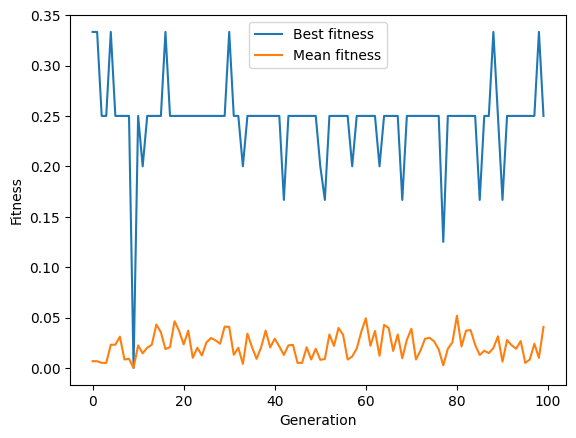

Median execution fitness evolution:


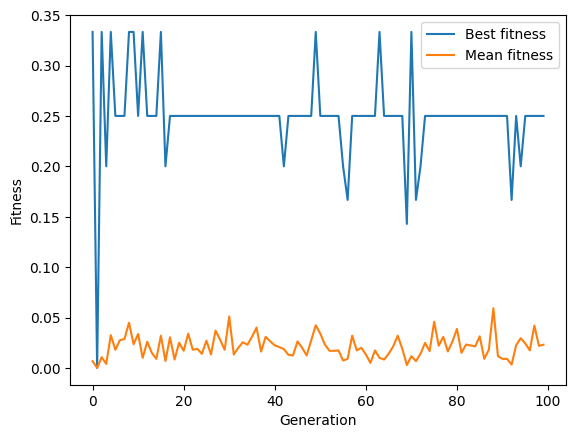

Worst execution fitness evolution:


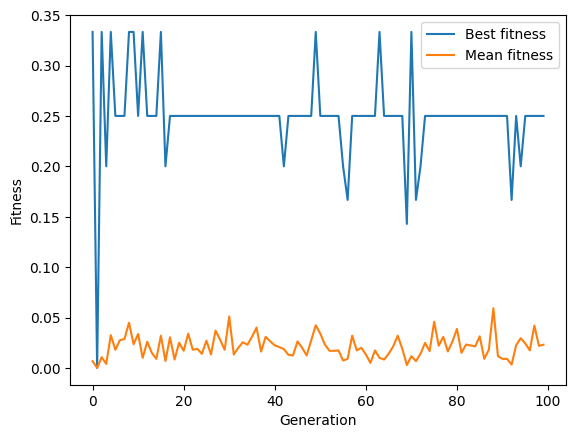

Mejor individuo del mejor: 

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | ALG    | BD     |        |
| Hora 2  | ALG    | IA     |        |
| Hora 3  | BD     | BD     |        |

Mejor individuo del mediano: 

|         | Día 1     | Día 2     | Día 3     |
|---------|-----------|-----------|-----------|
| Hora 1  | BD        |           | ALG/BD/BD |
| Hora 2  |           |           | IA        |
| Hora 3  |           |           | ALG       |

Mejor individuo del peor: 

|         | Día 1     | Día 2     | Día 3     |
|---------|-----------|-----------|-----------|
| Hora 1  | BD        |           | ALG/BD/BD |
| Hora 2  |           |           | IA        |
| Hora 3  |           |           | ALG       |
Running Genetic Algorithm with seed 1234590
Running Genetic Algorithm with seed 1234613
Running Genetic Algorithm with seed 1234636
Running Genetic Algorithm with seed 1234659
Running Genetic Algorithm with seed 1234682
Running Genetic

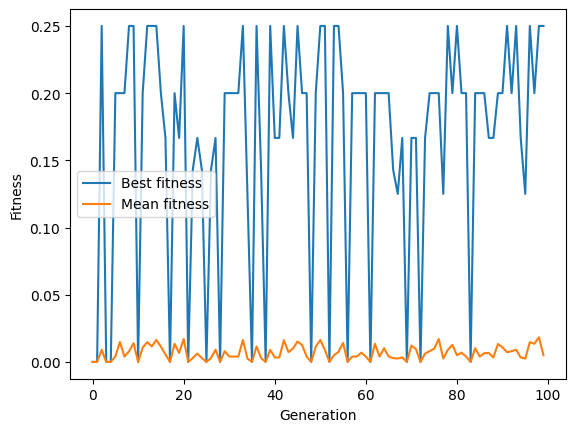

Median execution fitness evolution:


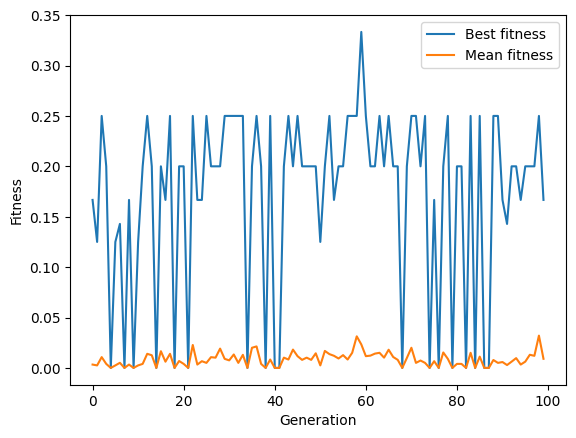

Worst execution fitness evolution:


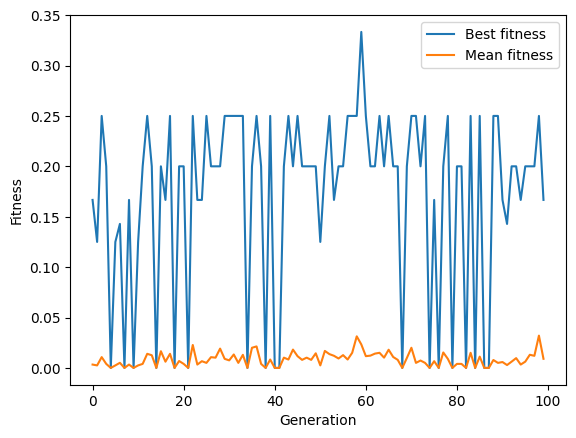

Mejor individuo del mejor: 

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        |        |        |
| Hora 2  | BD     | ALG    | BD     |
| Hora 3  | BD     | IA     | ALG    |
| Hora 4  |        | POO    | POO    |

Mejor individuo del mediano: 

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        | ALG    | IA     |
| Hora 2  | BD/POO |        | ALG    |
| Hora 3  |        |        | BD     |
| Hora 4  |        | BD     | POO    |

Mejor individuo del peor: 

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        | ALG    | IA     |
| Hora 2  | BD/POO |        | ALG    |
| Hora 3  |        |        | BD     |
| Hora 4  |        | BD     | POO    |
Running Genetic Algorithm with seed 1234590
Running Genetic Algorithm with seed 1234613
Running Genetic Algorithm with seed 1234636
Running Genetic Algorithm with seed 1234659
Running Genetic Algorithm with s

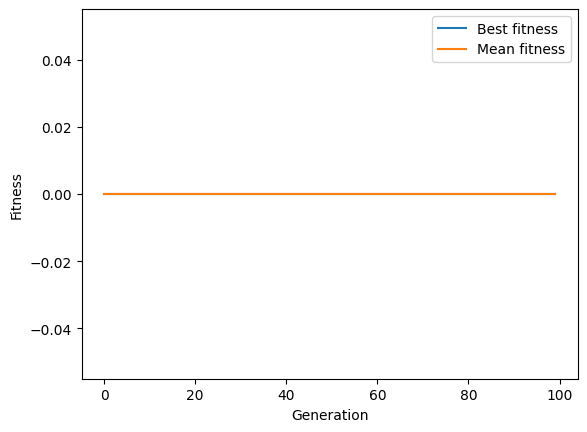

Median execution fitness evolution:


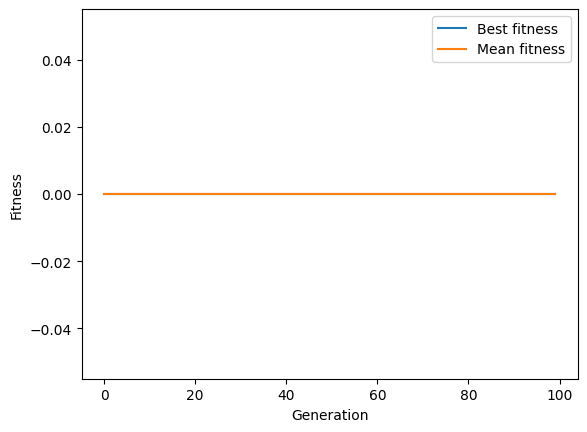

Worst execution fitness evolution:


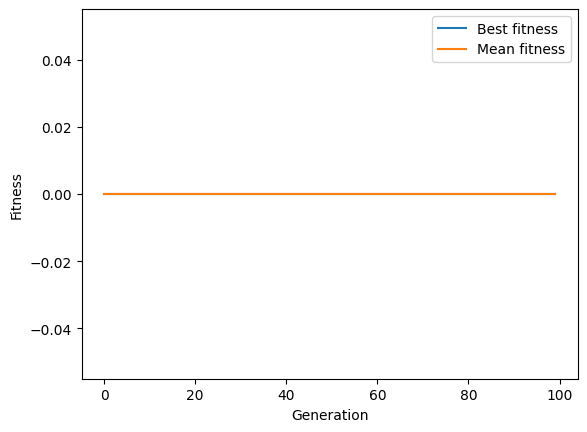

Mejor individuo del mejor: 

|         | Día 1  | Día 2  | Día 3  | Día 4  |
|---------|--------|--------|--------|--------|
| Hora 1  | BD/POO | ALG    | POO    | BD     |
| Hora 2  | ALG    |        |        | ALG    |
| Hora 3  | IA/BD  | POO    |        | BD     |
| Hora 4  | BD/POO | IA     | ALG    | BD     |

Mejor individuo del mediano: 

|         | Día 1  | Día 2  | Día 3  | Día 4  |
|---------|--------|--------|--------|--------|
| Hora 1  | BD/POO | ALG    | POO    | BD     |
| Hora 2  | ALG    |        |        | ALG    |
| Hora 3  | IA/BD  | POO    |        | BD     |
| Hora 4  | BD/POO | IA     | ALG    | BD     |

Mejor individuo del peor: 

|         | Día 1  | Día 2  | Día 3  | Día 4  |
|---------|--------|--------|--------|--------|
| Hora 1  | BD/POO | ALG    | POO    | BD     |
| Hora 2  | ALG    |        |        | ALG    |
| Hora 3  | IA/BD  | POO    |        | BD     |
| Hora 4  | BD/POO | IA     | ALG    | BD     |
Running Genetic Algorithm with seed 1234590
Ru

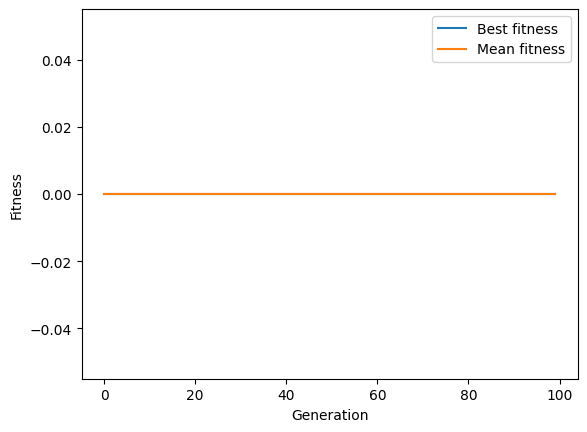

Median execution fitness evolution:


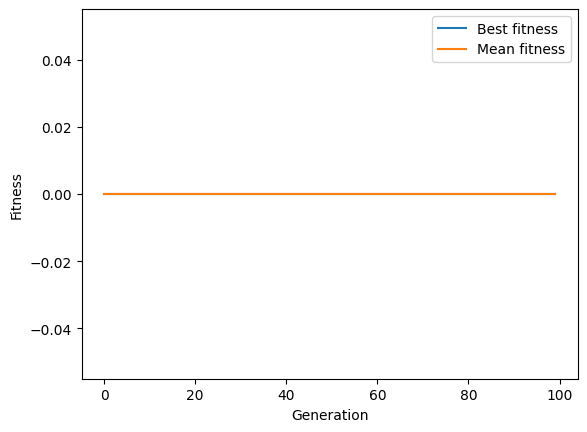

Worst execution fitness evolution:


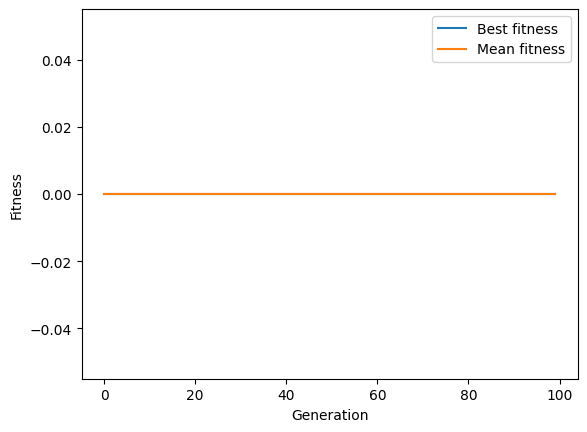

Mejor individuo del mejor: 

|         | Día 1     | Día 2     | Día 3     | Día 4     |
|---------|-----------|-----------|-----------|-----------|
| Hora 1  |           | AC        |           | BD        |
| Hora 2  | ALG       |           | POO       |           |
| Hora 3  |           |           | IA        | AC        |
| Hora 4  | IA        | ALG/POO   | BD        | BD/POO/AC |
| Hora 5  | ALG       | AC        | BD/BD     | BD/POO    |
| Hora 6  |           | ALG       |           |           |

Mejor individuo del mediano: 

|         | Día 1     | Día 2     | Día 3     | Día 4     |
|---------|-----------|-----------|-----------|-----------|
| Hora 1  |           | AC        |           | BD        |
| Hora 2  | ALG       |           | POO       |           |
| Hora 3  |           |           | IA        | AC        |
| Hora 4  | IA        | ALG/POO   | BD        | BD/POO/AC |
| Hora 5  | ALG       | AC        | BD/BD     | BD/POO    |
| Hora 6  |           | ALG       |    

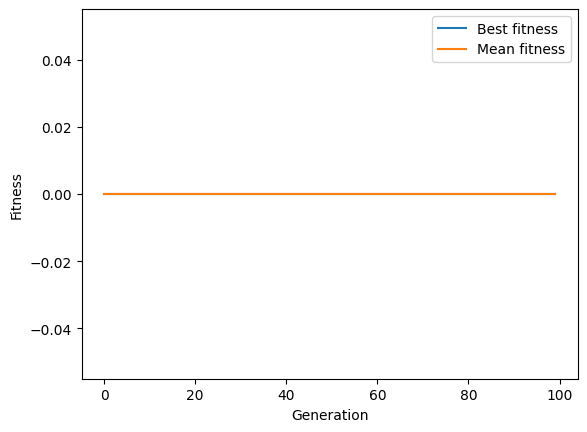

Median execution fitness evolution:


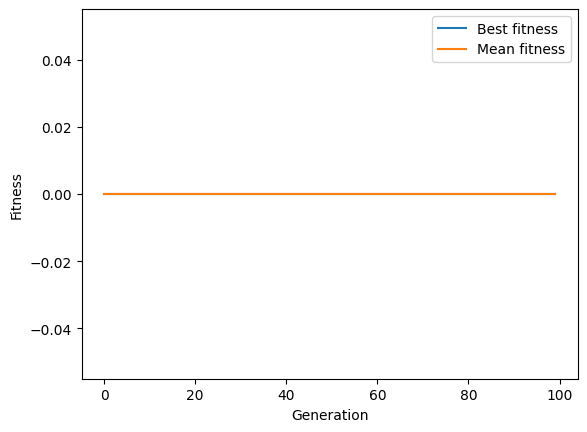

Worst execution fitness evolution:


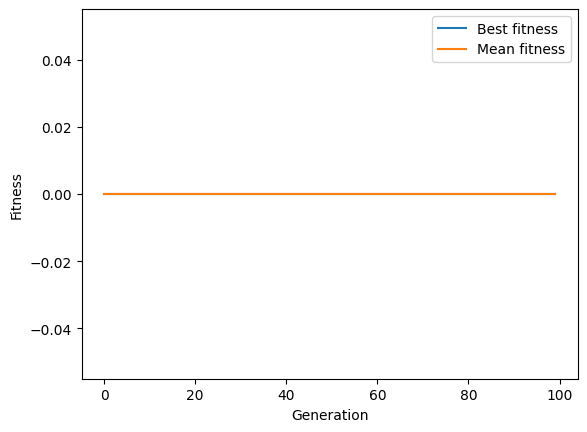

Mejor individuo del mejor: 

|         | Día 1   | Día 2   | Día 3   | Día 4   |
|---------|---------|---------|---------|---------|
| Hora 1  | TP      | ALG/TP  |         | AC      |
| Hora 2  | BD/FP   |         |         | ALG/BD  |
| Hora 3  |         | FP      |         |         |
| Hora 4  |         | FP      |         | BD      |
| Hora 5  | POO     | IA/FP   |         | POO     |
| Hora 6  | POO/POO |         | AC      |         |
| Hora 7  |         |         | BD      | AC      |
| Hora 8  | AC      | ALG     | IA/ALG  | BD/BD   |

Mejor individuo del mediano: 

|         | Día 1   | Día 2   | Día 3   | Día 4   |
|---------|---------|---------|---------|---------|
| Hora 1  | TP      | ALG/TP  |         | AC      |
| Hora 2  | BD/FP   |         |         | ALG/BD  |
| Hora 3  |         | FP      |         |         |
| Hora 4  |         | FP      |         | BD      |
| Hora 5  | POO     | IA/FP   |         | POO     |
| Hora 6  | POO/POO |         | AC      |         |
| H

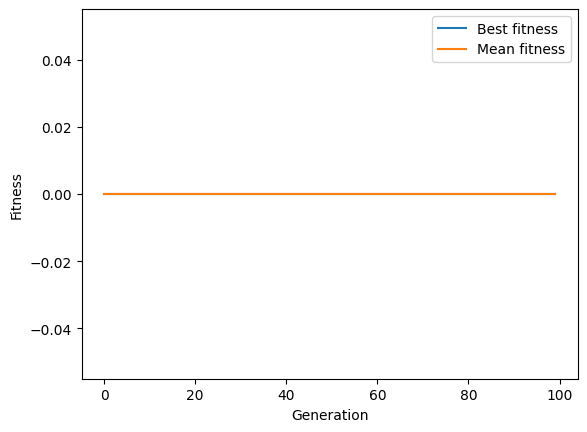

Median execution fitness evolution:


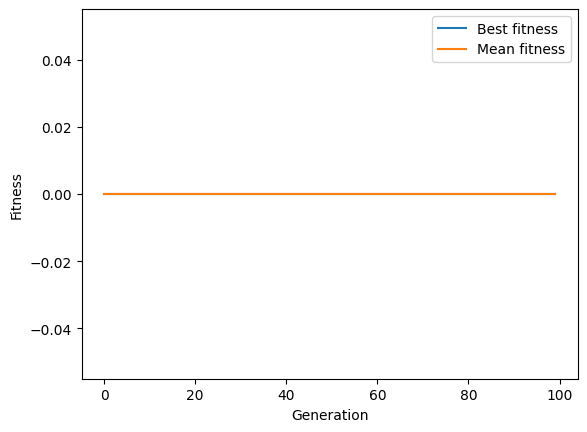

Worst execution fitness evolution:


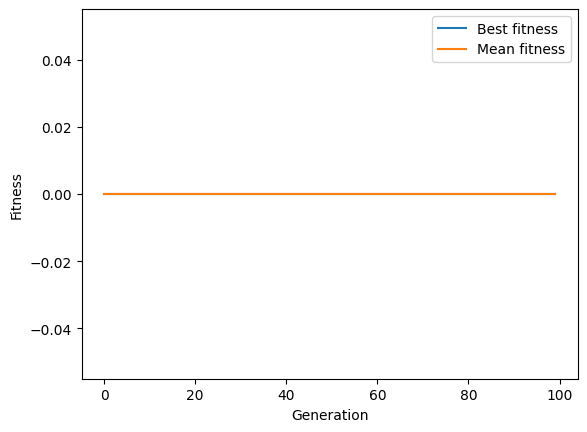

Mejor individuo del mejor: 

|         | Día 1    | Día 2    | Día 3    | Día 4    | Día 5    |
|---------|----------|----------|----------|----------|----------|
| Hora 1  | LMD      |          |          |          | POO      |
| Hora 2  |          |          |          |          |          |
| Hora 3  |          |          |          | ALG/BD   |          |
| Hora 4  | AM       |          | BD       | FP       |          |
| Hora 5  | TSO      | FP       | POO      | AC/FP/TP |          |
| Hora 6  | POO      | LMD      | FC       |          | IA       |
| Hora 7  |          | BD       |          | BD       |          |
| Hora 8  | ALG/FC   |          |          | AC       | TSO      |
| Hora 9  |          | BD       | IA       |          |          |
| Hora 10 | FC/LMD   | ALG      |          | FP/LMD   |          |
| Hora 11 | TP       | AM       | BD/FC    | AC/AM    |          |
| Hora 12 | ALG      |          | POO/AC   |          | AM       |

Mejor individuo del mediano: 

|

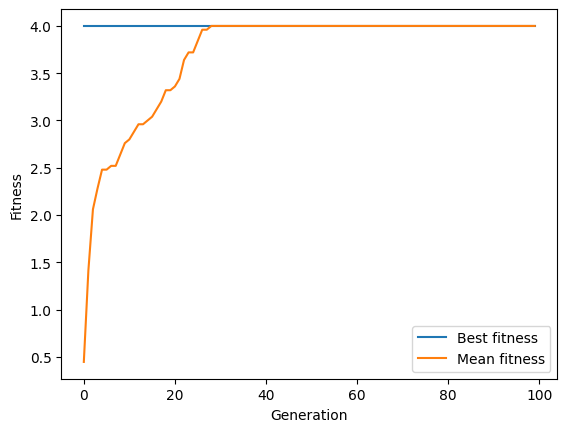

Median execution fitness evolution:


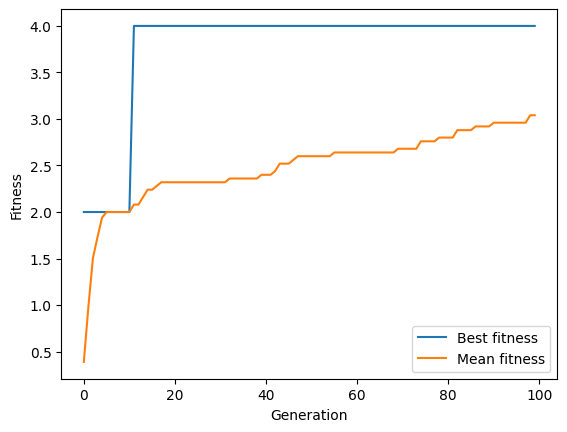

Worst execution fitness evolution:


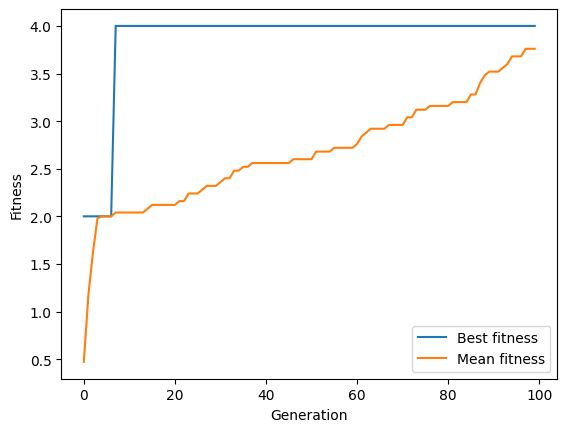

Mejor individuo del mejor: 

[['' '2' '1']
 ['' '0' '2']
 ['' '1' '2']]
4.0

Mejor individuo del mediano: 

[['2' '' '1']
 ['' '0' '12']
 ['' '' '2']]
0.5

Mejor individuo del peor: 

[['2' '' '0']
 ['' '2' '']
 ['' '211' '']]
0.04
Running Genetic Algorithm with seed 1234590
Running Genetic Algorithm with seed 1234613
Running Genetic Algorithm with seed 1234636
Running Genetic Algorithm with seed 1234659
Running Genetic Algorithm with seed 1234682
Running Genetic Algorithm with seed 1234705
Running Genetic Algorithm with seed 1234728
Running Genetic Algorithm with seed 1234751
Running Genetic Algorithm with seed 1234774
Running Genetic Algorithm with seed 1234797
Running Genetic Algorithm with seed 1234820
Running Genetic Algorithm with seed 1234843
Running Genetic Algorithm with seed 1234866
Running Genetic Algorithm with seed 1234889
Running Genetic Algorithm with seed 1234912
Running Genetic Algorithm with seed 1234935
Running Genetic Algorithm with seed 1234958
Running Genetic Algo

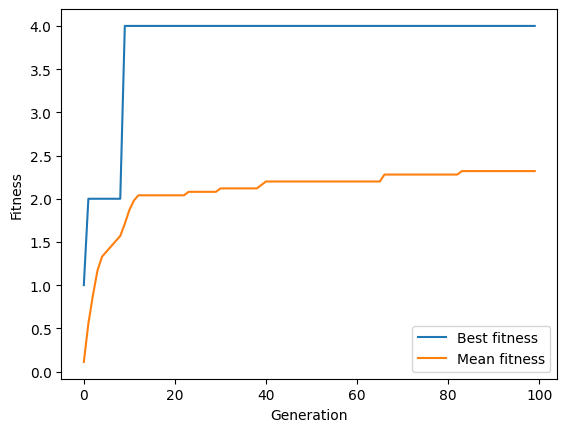

Median execution fitness evolution:


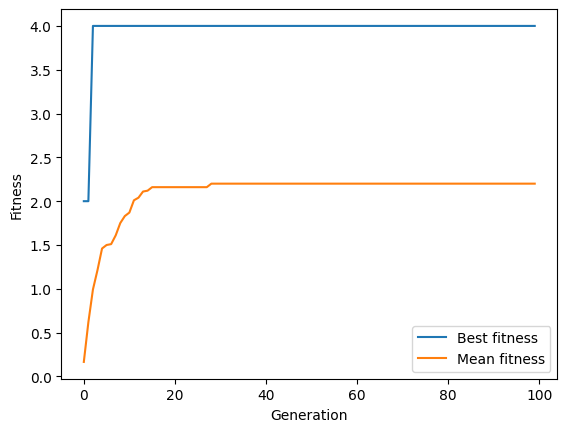

Worst execution fitness evolution:


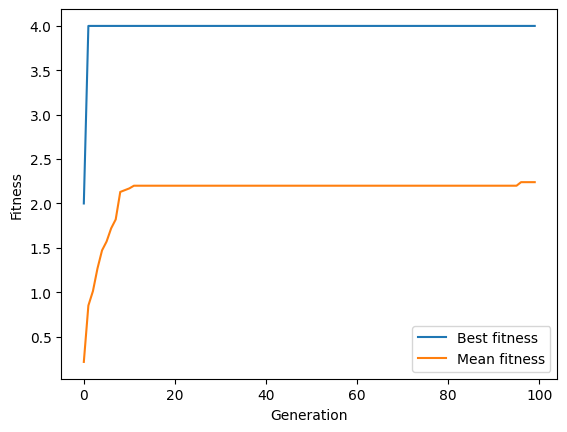

Mejor individuo del mejor: 

[['' '' '1']
 ['2' '2' '0']
 ['' '2' '3']
 ['1' '' '3']]
2.0

Mejor individuo del mediano: 

[['3' '' '2']
 ['12' '2' '3']
 ['0' '' '']
 ['' '1' '']]
0.25

Mejor individuo del peor: 

[['' '' '3']
 ['' '32' '']
 ['' '22' '0']
 ['' '' '11']]
0.0032
Running Genetic Algorithm with seed 1234590
Running Genetic Algorithm with seed 1234613
Running Genetic Algorithm with seed 1234636
Running Genetic Algorithm with seed 1234659
Running Genetic Algorithm with seed 1234682
Running Genetic Algorithm with seed 1234705
Running Genetic Algorithm with seed 1234728
Running Genetic Algorithm with seed 1234751
Running Genetic Algorithm with seed 1234774
Running Genetic Algorithm with seed 1234797
Running Genetic Algorithm with seed 1234820
Running Genetic Algorithm with seed 1234843
Running Genetic Algorithm with seed 1234866
Running Genetic Algorithm with seed 1234889
Running Genetic Algorithm with seed 1234912
Running Genetic Algorithm with seed 1234935
Running Genetic Alg

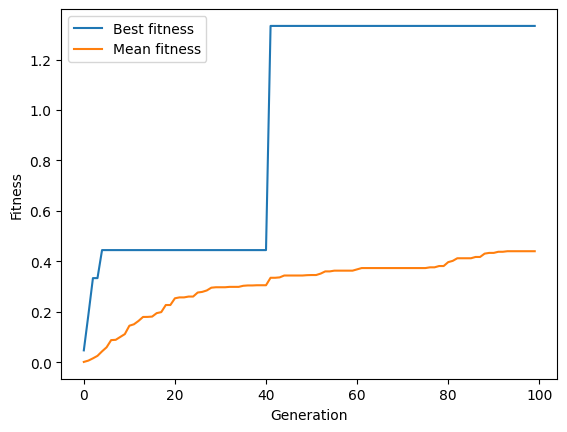

Median execution fitness evolution:


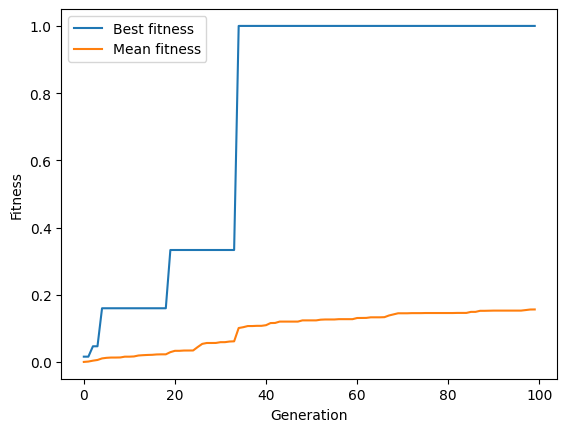

Worst execution fitness evolution:


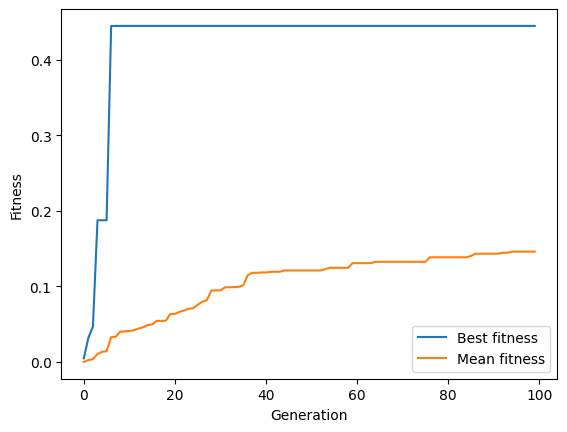

Mejor individuo del mejor: 

[['1' '' '02' '0']
 ['23' '' '2' '3']
 ['2' '1' '3' '2']
 ['' '3' '1' '12']]
0.046875

Mejor individuo del mediano: 

[['13' '12' '0' '1']
 ['' '1' '2' '23']
 ['23' '3' '' '20']
 ['' '' '2' '']]
1.6935087808430286e-05

Mejor individuo del peor: 

[['2' '' '' '3312']
 ['' '21' '3' '02']
 ['' '' '' '2']
 ['0' '311' '' '2']]
1.8859919074465488e-10
Running Genetic Algorithm with seed 1234590
Running Genetic Algorithm with seed 1234613
Running Genetic Algorithm with seed 1234636
Running Genetic Algorithm with seed 1234659
Running Genetic Algorithm with seed 1234682
Running Genetic Algorithm with seed 1234705
Running Genetic Algorithm with seed 1234728
Running Genetic Algorithm with seed 1234751
Running Genetic Algorithm with seed 1234774
Running Genetic Algorithm with seed 1234797
Running Genetic Algorithm with seed 1234820
Running Genetic Algorithm with seed 1234843
Running Genetic Algorithm with seed 1234866
Running Genetic Algorithm with seed 1234889
Running 

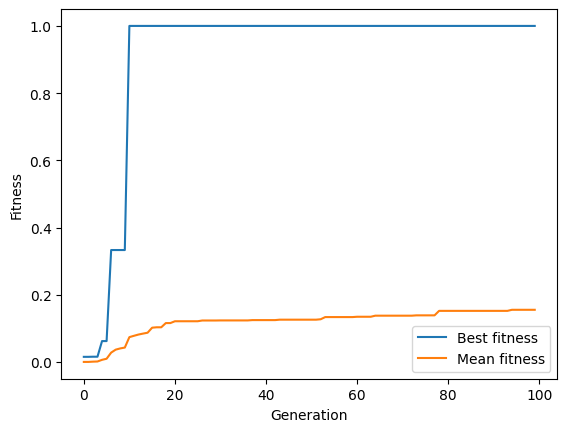

Median execution fitness evolution:


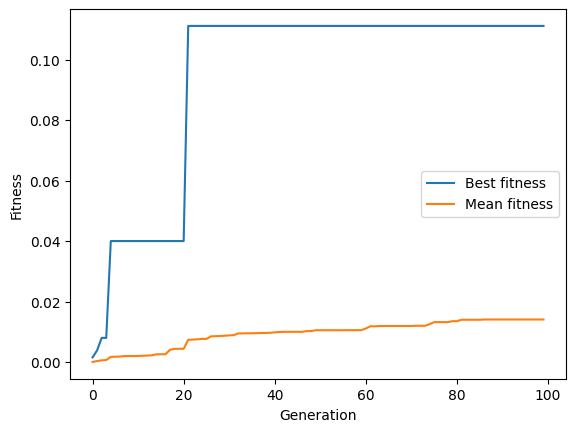

Worst execution fitness evolution:


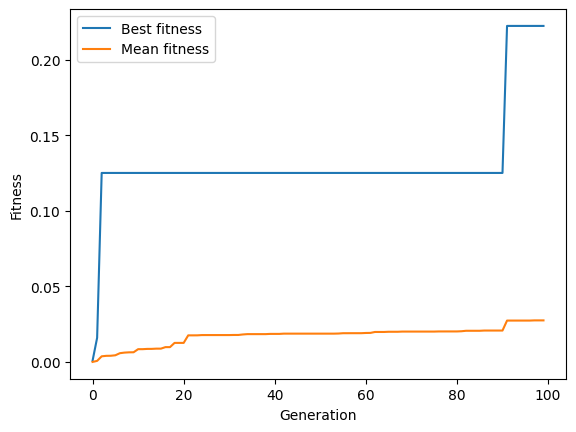

Mejor individuo del mejor: 

[['' '2' '1' '']
 ['1' '13' '2' '4']
 ['3' '2' '1' '0']
 ['' '3' '2' '']
 ['2' '0' '' '3']
 ['4' '' '24' '4']]
0.015625

Mejor individuo del mediano: 

[['' '2' '4' '03']
 ['' '3' '231' '2']
 ['4' '1' '22' '']
 ['' '2' '4' '']
 ['11' '4' '0' '3']
 ['' '' '' '']]
1.8816764231589208e-06

Mejor individuo del peor: 

[['' '' '' '01']
 ['4' '14' '02' '']
 ['23' '4' '' '2']
 ['211' '34' '' '']
 ['2' '' '' '2']
 ['3' '3' '' '']]
9.429959537232744e-11
Running Genetic Algorithm with seed 1234590
Running Genetic Algorithm with seed 1234613
Running Genetic Algorithm with seed 1234636
Running Genetic Algorithm with seed 1234659
Running Genetic Algorithm with seed 1234682
Running Genetic Algorithm with seed 1234705
Running Genetic Algorithm with seed 1234728
Running Genetic Algorithm with seed 1234751
Running Genetic Algorithm with seed 1234774
Running Genetic Algorithm with seed 1234797
Running Genetic Algorithm with seed 1234820
Running Genetic Algorithm with seed 123

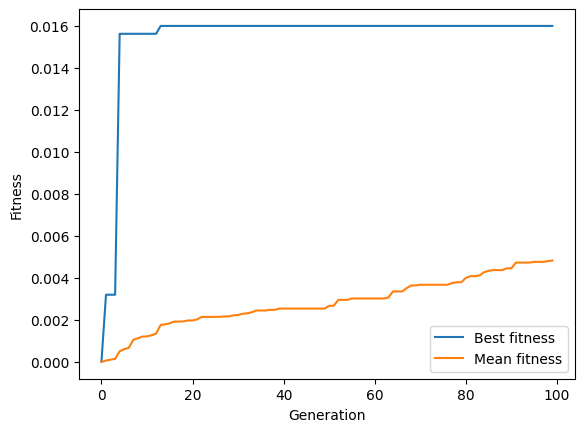

Median execution fitness evolution:


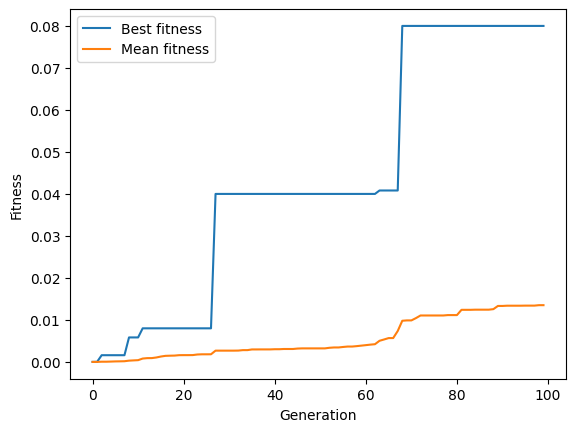

Worst execution fitness evolution:


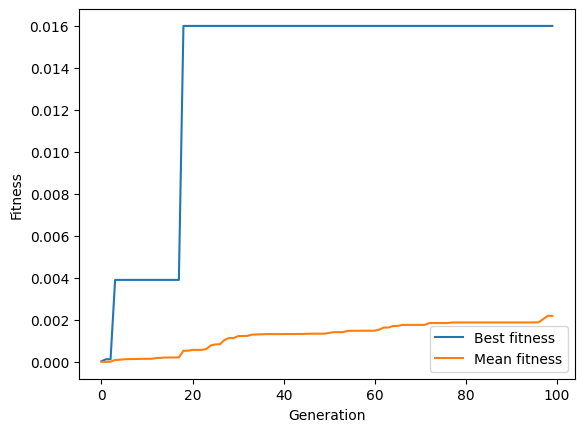

Mejor individuo del mejor: 

[['' '2' '2' '2']
 ['' '0' '6' '5']
 ['2' '55' '6' '4']
 ['4' '41' '' '3']
 ['3' '' '2' '4']
 ['' '' '133' '2']
 ['' '' '1' '0']
 ['1' '' '' '5']]
0.0015432098765432098

Mejor individuo del mediano: 

[['4' '3' '' '3']
 ['' '1' '' '4']
 ['56' '' '2' '3']
 ['25' '5' '2' '64']
 ['52' '' '' '40']
 ['' '' '2' '1']
 ['3' '2' '' '1']
 ['0' '1' '' '']]
2.3230573125418773e-08

Mejor individuo del peor: 

[['' '' '5' '4']
 ['4' '' '3222' '']
 ['1' '32' '5' '66']
 ['022' '' '' '3']
 ['' '' '' '']
 ['145' '5' '' '']
 ['' '' '' '0']
 ['34' '1' '' '1']]
1.716378016662696e-15
Running Genetic Algorithm with seed 1234590
Running Genetic Algorithm with seed 1234613
Running Genetic Algorithm with seed 1234636
Running Genetic Algorithm with seed 1234659
Running Genetic Algorithm with seed 1234682
Running Genetic Algorithm with seed 1234705
Running Genetic Algorithm with seed 1234728
Running Genetic Algorithm with seed 1234751
Running Genetic Algorithm with seed 1234774
Runnin

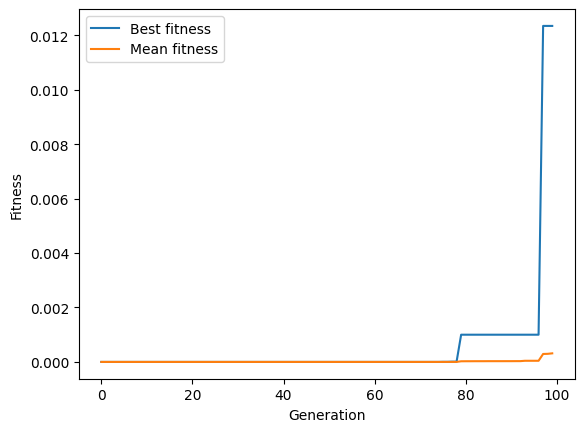

Median execution fitness evolution:


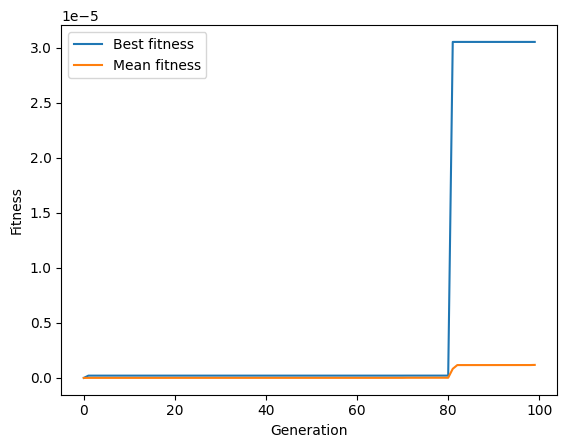

Worst execution fitness evolution:


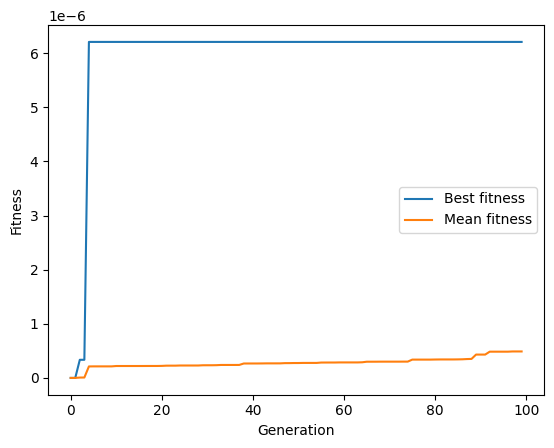

Mejor individuo del mejor: 

[['7' '' '99' '3' '0']
 ['1' '5' '' '3' '0']
 ['' '2' '1' '4' '1']
 ['2' '' '1' '9' '']
 ['5' '5' '' '' '']
 ['' '0' '05' '2' '2']
 ['1' '1' '9' '' '']
 ['' '2' '4' '' '']
 ['' '' '7' '8' '']
 ['7' '4' '2' '16' '']
 ['0' '6' '' '4' '']
 ['7' '3' '' '3' '8']]
1.8816764231589208e-06

Mejor individuo del mediano: 

[['5' '' '02' '' '6']
 ['' '' '2' '7' '33']
 ['' '' '44' '32' '']
 ['2' '' '' '1' '']
 ['75' '9' '' '' '']
 ['' '9' '' '7' '1']
 ['' '10' '5' '69' '7']
 ['' '' '1' '2' '']
 ['110' '1' '09' '5' '1']
 ['' '' '' '' '']
 ['' '80' '2' '' '34']
 ['' '' '0' '8' '4']]
6.587126226083936e-20

Mejor individuo del peor: 

[['' '' '3' '' '']
 ['' '' '91' '2' '']
 ['4' '' '5' '68' '4']
 ['0' '52102' '' '0' '2']
 ['' '6' '' '5' '']
 ['' '' '' '3' '90']
 ['' '130' '1' '' '']
 ['' '' '9' '' '15']
 ['7' '' '' '' '1']
 ['4' '' '4910' '' '8']
 ['' '7' '' '3' '1']
 ['' '2712' '10' '71' '']]
4.7891646873397845e-32


In [1767]:
# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234590 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset1, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=100, tournament_size=2)
print("Mejor individuo del mejor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))], dataset=dataset1)
print("\nMejor individuo del mediano: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))], dataset=dataset1)
print("\nMejor individuo del peor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))], dataset=dataset1)

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset2, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=100, tournament_size=2)
print("Mejor individuo del mejor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))], dataset=dataset2)
print("\nMejor individuo del mediano: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))], dataset=dataset2)
print("\nMejor individuo del peor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))], dataset=dataset2)

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset3, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=100, tournament_size=2)
print("Mejor individuo del mejor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))], dataset=dataset3)
print("\nMejor individuo del mediano: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))], dataset=dataset3)
print("\nMejor individuo del peor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))], dataset=dataset3)

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset4, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=100, tournament_size=2)
print("Mejor individuo del mejor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))], dataset=dataset4)
print("\nMejor individuo del mediano: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))], dataset=dataset4)
print("\nMejor individuo del peor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))], dataset=dataset4)

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset5, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=100, tournament_size=2)
print("Mejor individuo del mejor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))], dataset=dataset5)
print("\nMejor individuo del mediano: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))], dataset=dataset5)
print("\nMejor individuo del peor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))], dataset=dataset5)

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset6, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=100, tournament_size=2)
print("Mejor individuo del mejor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))], dataset=dataset6)
print("\nMejor individuo del mediano: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))], dataset=dataset6)
print("\nMejor individuo del peor: \n")
print_timetabling_solution(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))], dataset=dataset6)
# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
# 1234567890 es la semilla de ejemplo

#FINALES-------------------------------------------------------------

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset1, generate_initial_population_final, 50, calculate_fitness_final, calculate_c1_final, calculate_c2_final,
                  calculate_p1_final, calculate_p2_final, calculate_p3_final, generation_stop_final, 50, tournament_selection_final, one_subject_crossover, 0.8,
                  change_every_mutation, 0.3, elite_selection, max_gen=100, tournament_size=8)
print("Mejor individuo del mejor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))])
print(max(bestFitnessIndAux))
print("\nMejor individuo del mediano: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))])
print(median(bestFitnessIndAux))
print("\nMejor individuo del peor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))])
print(min(bestFitnessIndAux))

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset2, generate_initial_population_final, 50, calculate_fitness_final, calculate_c1_final, calculate_c2_final,
                  calculate_p1_final, calculate_p2_final, calculate_p3_final, generation_stop_final, 50, tournament_selection_final, one_subject_crossover, 0.8,
                  change_every_mutation, 0.3, elite_selection, max_gen=100, tournament_size=8)
print("Mejor individuo del mejor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))])
print(max(bestFitnessIndAux))
print("\nMejor individuo del mediano: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))])
print(median(bestFitnessIndAux))
print("\nMejor individuo del peor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))])
print(min(bestFitnessIndAux))

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset3, generate_initial_population_final, 50, calculate_fitness_final, calculate_c1_final, calculate_c2_final,
                  calculate_p1_final, calculate_p2_final, calculate_p3_final, generation_stop_final, 50, tournament_selection_final, one_subject_crossover, 0.8,
                  change_every_mutation, 0.3, elite_selection, max_gen=100, tournament_size=8)
print("Mejor individuo del mejor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))])
print(max(bestFitnessIndAux))
print("\nMejor individuo del mediano: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))])
print(median(bestFitnessIndAux))
print("\nMejor individuo del peor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))])
print(min(bestFitnessIndAux))

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset4, generate_initial_population_final, 50, calculate_fitness_final, calculate_c1_final, calculate_c2_final,
                  calculate_p1_final, calculate_p2_final, calculate_p3_final, generation_stop_final, 50, tournament_selection_final, one_subject_crossover, 0.8,
                  change_every_mutation, 0.3, elite_selection, max_gen=100, tournament_size=8)
print("Mejor individuo del mejor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))])
print(max(bestFitnessIndAux))
print("\nMejor individuo del mediano: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))])
print(median(bestFitnessIndAux))
print("\nMejor individuo del peor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))])
print(min(bestFitnessIndAux))

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset5, generate_initial_population_final, 50, calculate_fitness_final, calculate_c1_final, calculate_c2_final,
                  calculate_p1_final, calculate_p2_final, calculate_p3_final, generation_stop_final, 50, tournament_selection_final, one_subject_crossover, 0.8,
                  change_every_mutation, 0.3, elite_selection, max_gen=100, tournament_size=8)
print("Mejor individuo del mejor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))])
print(max(bestFitnessIndAux))
print("\nMejor individuo del mediano: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))])
print(median(bestFitnessIndAux))
print("\nMejor individuo del peor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))])
print(min(bestFitnessIndAux))

bestIndividualsAux,bestFitnessIndAux,_,_,_,_ = launch_experiment(seeds, dataset6, generate_initial_population_final, 50, calculate_fitness_final, calculate_c1_final, calculate_c2_final,
                  calculate_p1_final, calculate_p2_final, calculate_p3_final, generation_stop_final, 50, tournament_selection_final, one_subject_crossover, 0.8,
                  change_every_mutation, 0.3, elite_selection, max_gen=100, tournament_size=8)
print("Mejor individuo del mejor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(max(bestFitnessIndAux))])
print(max(bestFitnessIndAux))
print("\nMejor individuo del mediano: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(median(bestFitnessIndAux))])
print(median(bestFitnessIndAux))
print("\nMejor individuo del peor: \n")
print(bestIndividualsAux[bestFitnessIndAux.index(min(bestFitnessIndAux))])
print(min(bestFitnessIndAux))


### Primera aproximación

**Resultados de la Primera Aproximación**

| Dataset 	| Algoritmo 	|   Tiempo(s)  	| Generaciones 	| C1           	| C2          	| P1           	| P2          	| P3          	|
|:-------:	|:---------:	|:------------:	|:------------:	|--------------	|-------------	|--------------	|-------------	|-------------	|
|    1    	|  Primero  	| 0.27 ± 0.003 	|   100 ± 0.0  	| 1.19 ± 0.79  	| 0.09 ± 0.3  	| 0.35 ± 0.55  	| 2.64 ± 0.48 	| 0.77 ± 0.66 	|
|    2    	|  Primero  	| 0.33 ± 0.004 	|   100 ± 0.0  	| 1.54  ± 0.92 	| 0.09 ± 0.3  	| 1.22 ± 1.14  	| 2.9 ± 0.3   	| 0.74 ± 0.77 	|
|    3    	|  Primero  	| 0.54 ± 0.007 	|   100 ± 0.0  	| 4.25  ± 0.93 	| 1.26 ± 0.71 	| 1.83  ± 1.29 	| 3.97 ± 0.18 	| 3.61 ± 1.3  	|
|    4    	|  Primero  	| 0.64 ± 0.008 	|   100 ± 0.0  	| 4.84 ± 1.07  	| 1.19 ± 0.98 	| 5.03 ± 1.83  	| 4 ± 0.0     	| 4.65 ± 1.33 	|
|    5    	|  Primero  	| 0.79 ± 0.011 	|   100 ± 0.0  	| 6.29  ± 1.22 	| 1.29 ± 0.82 	| 8.52 ± 2.46  	| 4  ± 0.0    	| 5.77 ± 1.64 	|
|    6    	|  Primero  	| 1.16 ± 0.014 	|   100 ± 0.0  	| 8.39 ± 1.82  	| 1.06 ± 0.99 	| 20.55 ± 3.97 	| 5  ± 0.0    	| 8.42 ± 2.23 	|

En los tres primeros dataset vemos que se alcanza un tiempo razonable, aunque esto se debe a la naturaleza de los algortimos geneticos.
Podemos observar que a partir del tercero, el fitness medio y el mejor son 0, puede ser debido a limitaciones conceptuales en cuanto a los parametros se refiere. Tambien vemos variaciones en cuanto a los valores de los parametros debido a los datasets.

### Aproximaciones Propuestas

**Resultados de Aproximaciones Propuestas**

| Dataset 	| Algoritmo 	|   Tiempo(s)  	| Generaciones 	| C1          	| C2          	| P1          	| P2          	| P3          	|
|:-------:	|:---------:	|:------------:	|:------------:	|-------------	|-------------	|-------------	|-------------	|-------------	|
|    1    	|   Final   	| 0.26 ± 0.002 	|   100 ± 0.0  	| 0.94 ± 0.51 	| 0 ± 0.0     	| 0.32 ± 0.48 	| 1.87 ± 1.28 	| 0.55 ± 0.62 	|
|    2    	|   Final   	| 0.28 ± 0.003 	|   100 ± 0.0  	| 1.16 ± 0.78 	| 0.09 ± 0.3  	| .09 ± 0.3   	| 1.87 ± 1.2  	| 0.29 ± 0.46 	|
|    3    	|   Final   	| 0.36 ± 0.004 	|   100 ± 0.0  	| 4.87 ± 1.2  	| 0.67 ± 0.65 	| 0 ± 0.0     	| 2.22 ± 1.45 	| 0.70 ± 0.69 	|
|    4    	|   Final   	| 0.40 ± 0.005 	|  100 ± 0.0  	| 5.38 ± 1.47 	| 0.9 ± 0.53  	| 0 ± 0.0     	| 3.19 ± 1.51 	| 0.12 ± 0.34 	|
|    5    	|   Final   	| 0.46 ± 0.005 	|   100 ± 0.0  	| 6.19 ± 1.62 	| 1.26 ± 0.99 	| 0 ± 0.0     	| 3.97 ± 1.68 	| 0.06 ± 0.25 	|
|    6    	|   Final   	| 0.64 ± 0.008 	|   100 ± 0.0  	| 11.87 ± 2.8 	| 2.25 ± 1.43 	| 0 ± 0.0     	| 7.54 ± 2.37 	| 0 ± 0.0     	|

Para nuestra aproximacion total nos hemos decantado por una seleccion por torneo con un N mayor, ya que aunque esto puede ocasionar un sesgo hacia los individuos con mejor fitness, nos ayuda a liberarnos de los individuos con peor fitness.
Hemos añadido tambien una seleccion por elite que nos ayuda a aumentar aun mas el sesgo, lo cual nos puede ocasionar que aunque siempre elegimos los mejores individuos podemos descartar algun camino que nos lleve a la solucion, y de esta manera quedarnos atascados en cerca de la solucion pero sin alcanzarla.

## Conclusiones

| Dataset 	| Algoritmo 	|   Tiempo(s)   	| Generaciones 	| C1           	| C2          	| P1           	| P2          	| P3          	|
|:-------:	|:---------:	|:-------------:	|:------------:	|--------------	|-------------	|--------------	|-------------	|-------------	|
|    1    	|  Primero  	|  0.27 ± 0.003 	|   100 ± 0.0  	| 1.19 ± 0.79  	| 0.09 ± 0.3  	| 0.35 ± 0.55  	| 2.64 ± 0.48 	| 0.77 ± 0.66 	|
|    1    	|   Final   	|  0.26 ± 0.002 	|  100 ± 0.0   	| 0.94 ± 0.51  	| 0 ± 0.0     	| 0.32 ± 0.48  	| 1.87 ± 1.28 	| 0.55 ± 0.62 	|
|    2    	|  Primero  	|  0.33 ± 0.004 	|   100 ± 0.0  	| 1.54  ± 0.92 	| 0.09 ± 0.3  	| 1.22 ± 1.14  	| 2.9 ± 0.3   	| 0.74 ± 0.77 	|
|    2    	|   Final   	|  0.28 ± 0.003 	|   100 ± 0.0  	| 1.16 ± 0.78  	| 0.09 ± 0.3  	| .09 ± 0.3    	| 1.87 ± 1.2  	| 0.29 ± 0.46 	|
|    3    	|  Primero  	|  0.54 ± 0.007 	|   100 ± 0.0  	| 4.25  ± 0.93 	| 1.26 ± 0.71 	| 1.83  ± 1.29 	| 3.97 ± 0.18 	| 3.61 ± 1.3  	|
|    3    	|   Final   	|  0.36 ± 0.004 	|   100 ± 0.0  	| 4.87 ± 1.2   	| 0.67 ± 0.65 	| 0 ± 0.0      	| 2.22 ± 1.45 	| 0.70 ± 0.69 	|
|    4    	|  Primero  	|  0.64 ± 0.008 	|   100 ± 0.0  	| 4.84 ± 1.07  	| 1.19 ± 0.98 	| 5.03 ± 1.83  	| 4 ± 0.0     	| 4.65 ± 1.33 	|
|    4    	|   Final   	|  0.40 ± 0.005 	|  100 ± 0.0  	| 5.38 ± 1.47  	| 0.9 ± 0.53  	| 0 ± 0.0      	| 3.19 ± 1.51 	| 0.12 ± 0.34 	|
|    5    	|  Primero  	| 0.79 ± 0.011  	|   100 ± 0.0  	| 6.29  ± 1.22 	| 1.29 ± 0.82 	| 8.52 ± 2.46  	| 4  ± 0.0    	| 5.77 ± 1.64 	|
|    5    	|   Final   	|  0.46 ± 0.005 	|   100 ± 0.0  	| 6.19 ± 1.62  	| 1.26 ± 0.99 	| 0 ± 0.0      	| 3.97 ± 1.68 	| 0.06 ± 0.25 	|
|    6    	|  Primero  	|  1.16 ± 0.014 	|   100 ± 0.0  	| 8.39 ± 1.82  	| 1.06 ± 0.99 	| 20.55 ± 3.97 	| 5  ± 0.0    	| 8.42 ± 2.23 	|
|    6    	|   Final   	|  0.64 ± 0.008 	|   100 ± 0.0  	| 11.87 ± 2.8  	| 2.25 ± 1.43 	| 0 ± 0.0      	| 7.54 ± 2.37 	| 0 ± 0.0     	|

Podemos observar que nuestra aproximacion es mucho mas eficiente que la primera, llegando a ser incluso cerca de la mitad en los ultimos datasets. Hemos observado tambien que en nuestra solucion siempre nos acercamos a una solucion pero, sobretodo en los datasets mas altos, no siempre llegamos a ella. Esto puede ser debido a como hemos modelado la seleccion y la mutacion. Tambien hemos comprobado que aumentado el numero de selecciones y modificando las probabilidades se llega al resultado esperado, pero debido a las limitaciones del enunciado dejamos el maximo de generacion en 100.